In [221]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import  ElasticNet
import math
from sklearn.metrics import mean_squared_error

In [222]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [223]:
dataset = pd.read_csv('real-gdp-per-capita.csv', index_col='Year', parse_dates=['Year'])


In [224]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1950-01-01 to 2004-01-01
Data columns (total 2 columns):
Philippines    55 non-null float64
Thailand       55 non-null float64
dtypes: float64(2)
memory usage: 1.3 KB


In [225]:
training_set = dataset[:'1988'].iloc[:,:].values
test_set = dataset['1988':].iloc[:,:].values

In [226]:
len(training_set)

39

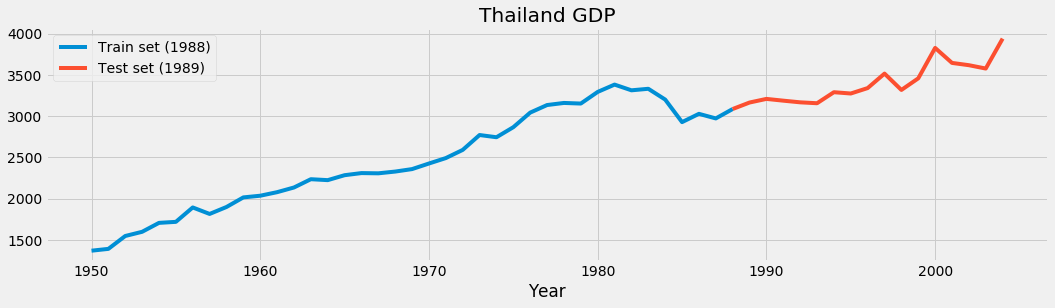

In [227]:
dataset['Philippines'][:'1988'].plot(figsize=(16,4), legend = True)
dataset['Philippines']['1988':].plot(figsize=(16,4), legend = True)
plt.legend(['Train set (1988)','Test set (1989)'])
plt.title('Thailand GDP')
plt.show()

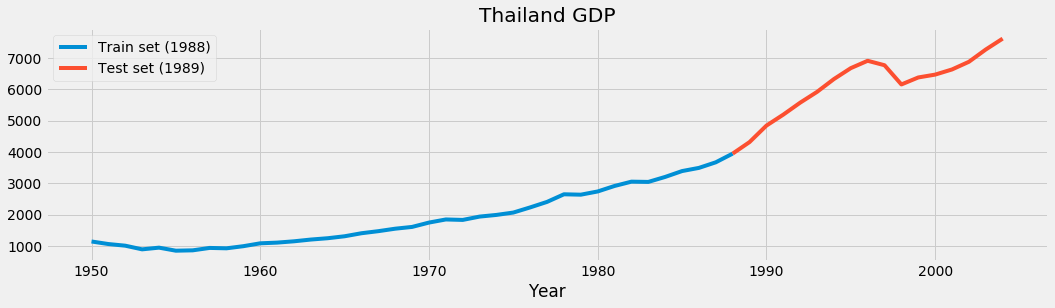

In [228]:
dataset['Thailand'][:'1988'].plot(figsize=(16,4), legend = True)
dataset['Thailand']['1988':].plot(figsize=(16,4), legend = True)
plt.legend(['Train set (1988)','Test set (1989)'])
plt.title('Thailand GDP')
plt.show()

In [229]:
# training set
X_train_ph = []
y_train_ph = []
X_train_th = []
y_train_th = []
# test set
X_test_ph = []
X_test_th = []


for i in range(3,len(training_set)):
    X_train_ph.append(training_set[i-3:i,0])
    y_train_ph.append(training_set[i,0])                      
X_train_ph, y_train_ph = np.array(X_train_ph), np.array(y_train_ph)

for i in range(3,len(training_set)):
    X_train_th.append(training_set[i-3:i,1])
    y_train_th.append(training_set[i,1])                      
X_train_th, y_train_th = np.array(X_train_th), np.array(y_train_th)

for i in range(3,len(test_set)):
    X_test_ph.append(test_set[i-3:i,0])                      
X_test_ph =  np.array(X_test_ph)

for i in range(3,len(test_set)):
    X_test_th.append(test_set[i-3:i,1])                      
X_test_th =  np.array(X_test_th)

In [230]:
X_train = np.concatenate((X_train_ph,X_train_th), axis = 1)
X_test = np.concatenate((X_test_ph,X_test_th), axis = 1)

In [231]:
y_train = np.concatenate((y_train_ph.reshape(-1,1),y_train_th.reshape(-1,1)),axis=1)

In [232]:
reg = MultiOutputRegressor(AdaBoostRegressor(base_estimator=LinearSVR(), n_estimators=100))
reg.fit(X_train, y_train)

G:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
G:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
G:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
G:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
G:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

MultiOutputRegressor(estimator=AdaBoostRegressor(base_estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=None),
           n_jobs=None)

In [233]:
predicted_GDP_Train = reg.predict(X_train)
predicted_GDP_Test = reg.predict(X_test)

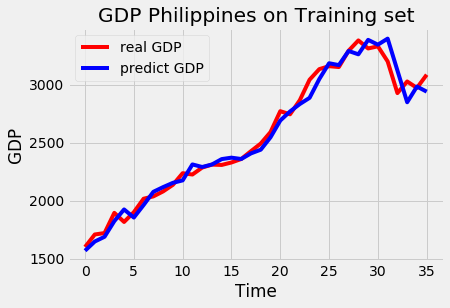

In [234]:
plt.plot(training_set[3:,0], color = 'red', label = 'real GDP')
plt.plot(predicted_GDP_Train[:,0], color = 'blue', label = 'predict GDP')
plt.title('GDP Philippines on Training set')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

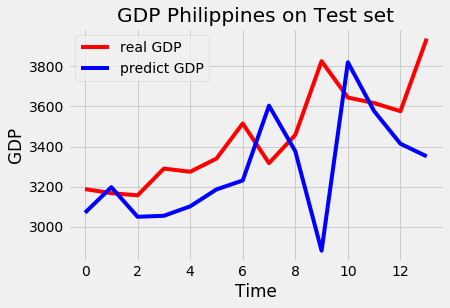

In [235]:
plt.plot(test_set[3:,0], color = 'red', label = 'real GDP')
plt.plot(predicted_GDP_Test[:,0], color = 'blue', label = 'predict GDP')
plt.title('GDP Philippines on Test set')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

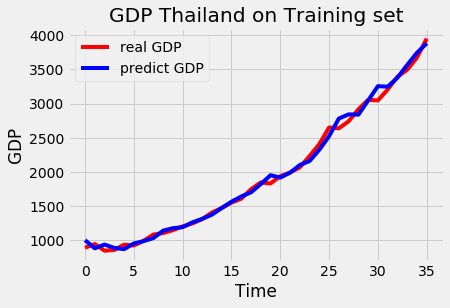

In [236]:
plt.plot(training_set[3:,1], color = 'red', label = 'real GDP')
plt.plot(predicted_GDP_Train[:,1], color = 'blue', label = 'predict GDP')
plt.title('GDP Thailand on Training set')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

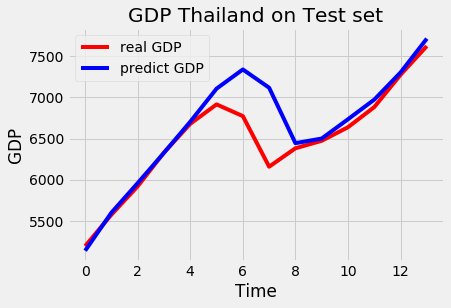

In [237]:
plt.plot(test_set[3:,1], color = 'red', label = 'real GDP')
plt.plot(predicted_GDP_Test[:,1], color = 'blue', label = 'predict GDP')
plt.title('GDP Thailand on Test set')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [238]:
rmse_train_ph = math.sqrt(mean_squared_error(training_set[3:,0],predicted_GDP_Train[:,0]))
rmse_train_th = math.sqrt(mean_squared_error(test_set[3:,0],predicted_GDP_Test[:,0]))

print("The root mean squared error of Philippines traning set",rmse_train_ph)
print("The root mean squared error of Philippines test set",rmse_train_th)

The root mean squared error of Philippines traning set 82.05674708456196
The root mean squared error of Philippines test set 338.28500912076714


In [239]:
rmse_train_ph = math.sqrt(mean_squared_error(training_set[3:,1],predicted_GDP_Train[:,1]))
rmse_train_th = math.sqrt(mean_squared_error(test_set[3:,1],predicted_GDP_Test[:,1]))

print("The root mean squared error of Thailand traning set",rmse_train_ph)
print("The root mean squared error of Thailand test set",rmse_train_th)

The root mean squared error of Thailand traning set 71.00796088123751
The root mean squared error of Thailand test set 306.16471822344624
